# Tutorial  8: Uncertainty

NeuralProphet does support multiple ways to incorporate uncertainty into the forecast. In this tutorial, we will explore the quantile regression uncertainty feature. You can read more on [Quantile regression on Wikipedia](https://en.wikipedia.org/wiki/Quantile_regression).

We start with the NeuralProphet base model from the previous tutorials and look at how to add uncertainty modelling to the forecast.

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 46it [00:00, ?it/s]

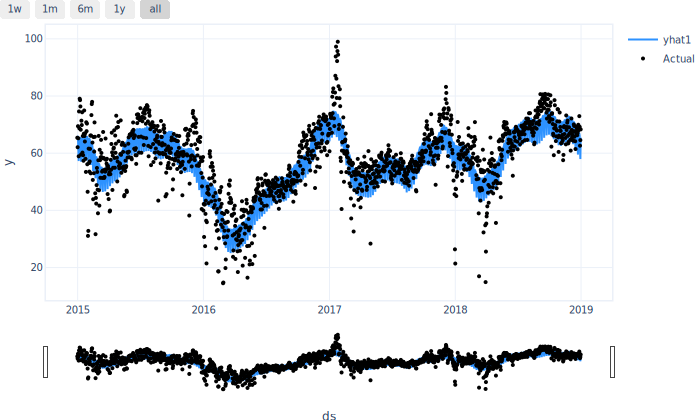

In [1]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")

# Load the dataset from the CSV file using pandas
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")

# Model and prediction
m = NeuralProphet()
m.set_plotting_backend("plotly-static")
metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

In comparison to point forecasting, uncertainty modelling predicts an interval of possible values for the forecast. Assuming we want the true value to be within the estimated interval with a probability of 80%, we set the confidence level to be `0.8`. We define two quantiles, `0.1` and `0.9`, which correspond to the 10th and 90th percentiles of the distribution of the forecast. The 80% confidence interval is then the difference between the 90th and 10th percentiles.

In [2]:
confidence_level = 0.8

boundaries = round((1 - confidence_level) / 2, 2)
# NeuralProphet only accepts quantiles value in between 0 and 1
quantiles = [boundaries, confidence_level + boundaries]
quantiles

[0.1, 0.9]

Setup model with uncertainty using the 10th and 90th percentiles.

In [3]:
# Create NeuralProphet model with list of quantiles
m = NeuralProphet(quantiles=quantiles)
m.set_plotting_backend("plotly-static")

metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

For the above method we used a quantile regression model, that uses the [pinball loss function](https://www.lokad.com/pinball-loss-function-definition) to assess the goodness-of-fit. While the defined coverage is guaranteed for the training date, it is not guaranteed for unseen data. More complex methods like Conformal Prediction can be used to guarantee [marginal coverage](https://arxiv.org/pdf/1903.04684.pdf) for unseen data. For a deeper dive into the topic, you can check out our tutorial on Uncertainty Quantification.